Описание данных интернет-магазина «Стримчик»
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<b>Шаг 1.</b> Открываем 'games.csv'

In [181]:
import pandas as pd
import numpy as np

df = pd.read_csv('games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<b>Шаг 2.</b> Подготовка данных
- Приводим к нижнему регистру названия столбцов

In [182]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

- Преобразуем данные в нужные типы



In [183]:
count = (df['user_score']=='tbd').sum()
count

2424

Из info видно, что 'user_score' в типе object, нужно привести к int. Также, в 'user_score' встречались строки 'tbd' (To Be Determinded), для удобного анализа данных, заменили 'tbd' на 'nan' и привели к типу 'float'.
<br>
year_of_release и critic_score преобразовали в тип integer из float, так как года и оценки критиков - целые числа.

In [184]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'] = df['user_score'].astype('float')
df['year_of_release'] = pd.to_numeric(df['year_of_release'], downcast='integer')
df['critic_score'] = pd.to_numeric(df['critic_score'], downcast='integer')
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<li>Обрабатываем пропуски</li>

In [185]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)
df['genre'] = df['genre'].fillna('ud')
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,NaN


В 'critic_score' и 'user_score' заменили индикаторными значениями "-1". В этих столбцах нельзя выявить закономерности по году или жанру, т.к. каждая игра является индивидуальной, а оценки критиков и пользоввателей - субъективным мнением.

В остальных столбцах, таких как 'year_of_release', 'rating' заменять что-либо не имеет смысла, т.к. нельзя выявить зависимость для замены.

В 'genre' пропуски заменили на "ud" (undefinded).

<hr>

Пропуски в данных о жанре, годе выпуска, оценках критиков и пользователей в датафрейме игр могут возникнуть из-за неполной или ошибочной информации при сборе данных. Это может быть вызвано отсутствием оценок, неполной категоризацией игр, техническими проблемами в процессе сбора данных или даже отсутствием однозначного определения для некоторых параметров, таких как жанр.

<li>Посчитать суммарные продажи во всех регионах

In [186]:
df['sales_total'] = 0

df['sales_total'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,NaN,0.01


<b>Шаг 3. Исследовательский анализ данных</b>

- Сколько игр выпускалось в разные годы

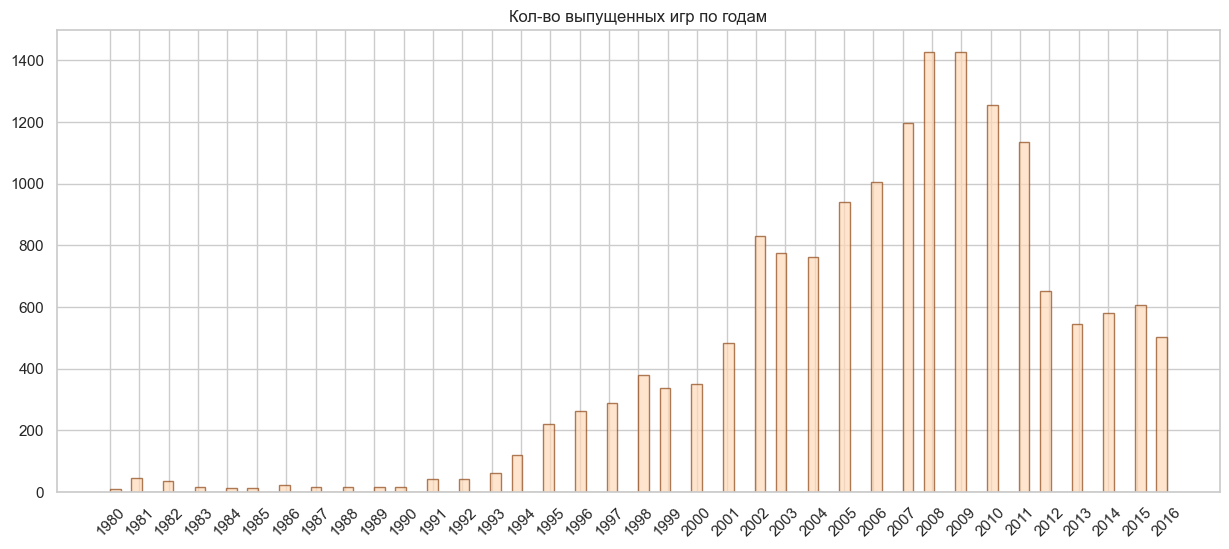

In [187]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.hist(df['year_of_release'], bins=100, color='#FFDAB9', alpha=0.7, edgecolor='#8B4513', linewidth=1)
plt.title('Кол-во выпущенных игр по годам')
plt.xticks(df['year_of_release'][pd.notna(df['year_of_release'])].unique(), rotation=45)
plt.show()

- Важны ли данные за все периоды?

До 1994 игры проактически не выпускались, поэтому анализ данных до этого года не является важным. В связи с развитием индустрии компьютерных игр в 2000-х годах наблюдается резкий рост выпущенных игр, пик которого достигается в 2008 году. Спад после 2009 совпадает с выходом мобильных теелфонов на базе android и iOS, с этого момента геймеры начинают использовать телефон как игровые консоли.

- Как менялись продажи по платформам

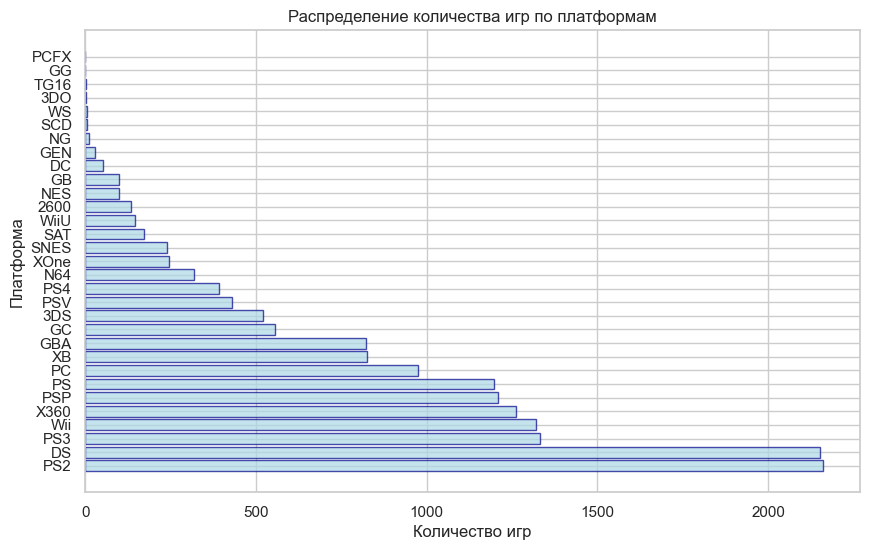

In [188]:
sorted_df = df['platform'].value_counts().reset_index()
sorted_df.columns = ['platform', 'count']
sorted_df = sorted_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(sorted_df['platform'], sorted_df['count'], color='lightblue', alpha=0.7, edgecolor='darkblue', linewidth=1)
plt.xlabel('Количество игр')
plt.ylabel('Платформа')
plt.title('Распределение количества игр по платформам')
plt.show()

Из гистограммы видно, что самые популярные игровые платформы - PS2, X360, PS3, WII, DS, PS.

- Данные за соответствующий актуальный период

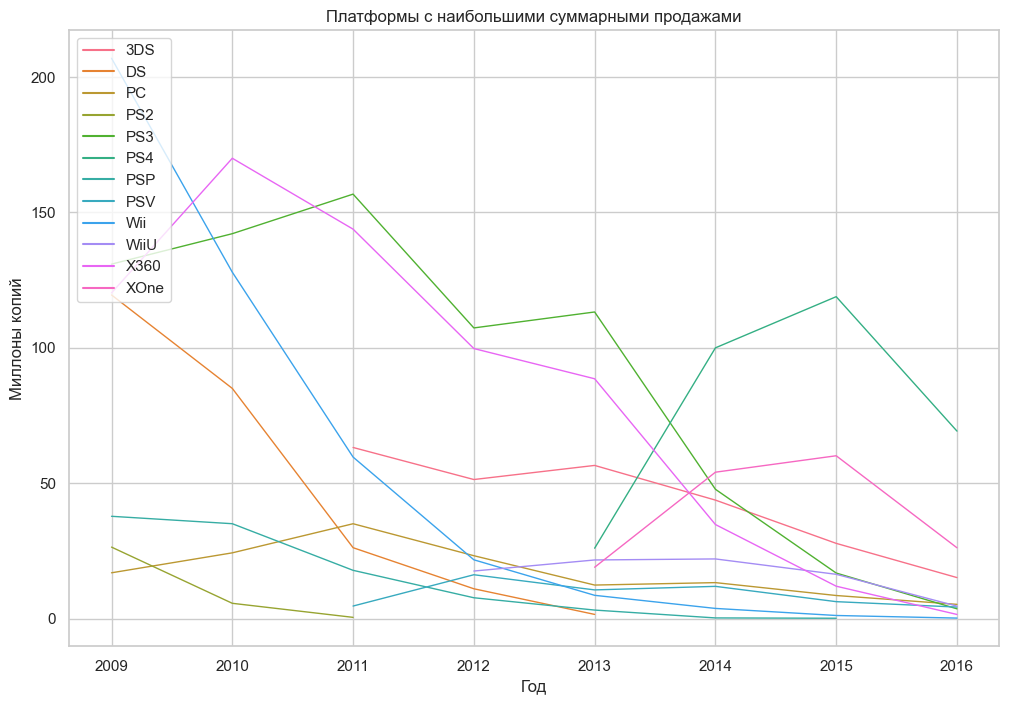

In [189]:
actualgames = df[df['year_of_release'] > 2008]
actualplatform = actualgames.pivot_table(index='year_of_release', columns='platform', values='sales_total', aggfunc='sum')
plt.figure(figsize=(12,8))
sns.lineplot(data = actualplatform, linewidth = 1, dashes=False)
plt.title('Платформы с наибольшими суммарными продажами')
plt.xlabel('Год')
plt.ylabel('Миллоны копий')
plt.legend(loc='upper left', fontsize=11,bbox_to_anchor=(0, 1))
plt.show()

- Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.
<br>
Топ-5: PS2, X360, PS3, WII, DS, PS

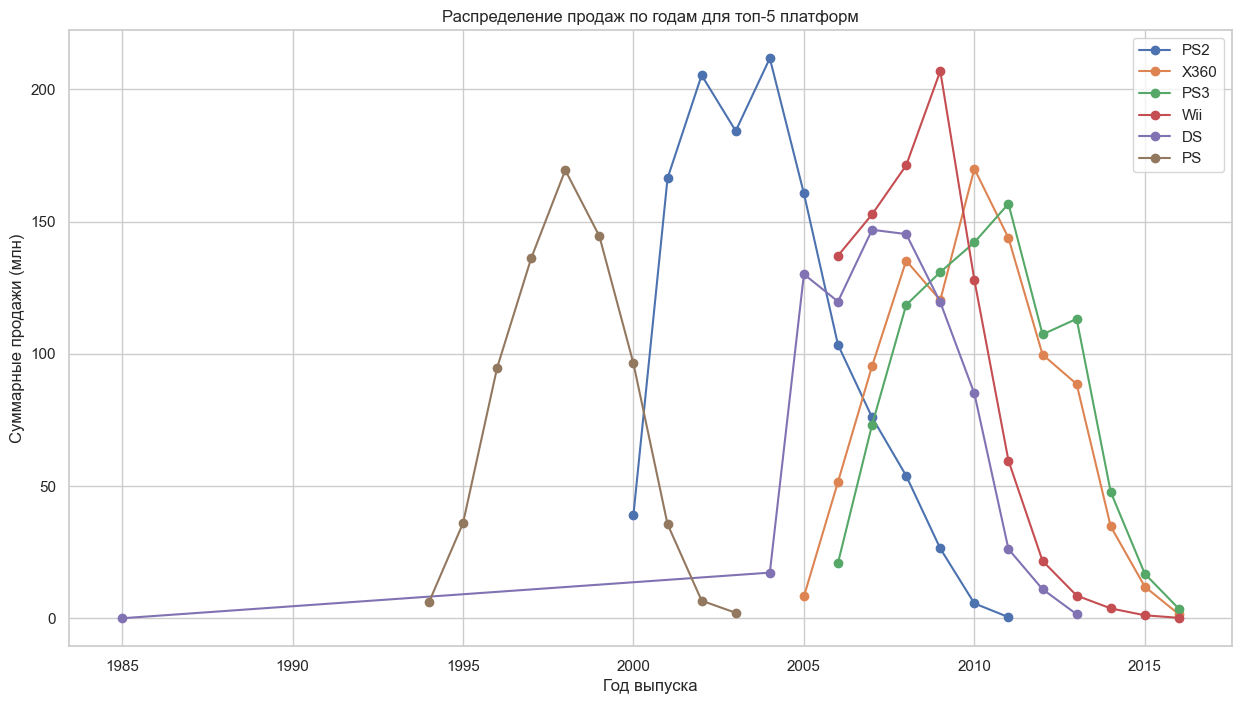

In [190]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
top_platforms_data = df[df['platform'].isin(top_platforms)]

platforms_sales = top_platforms_data.groupby(['platform', 'year_of_release'])['sales_total'].sum().reset_index()

plt.figure(figsize=(15, 8))
for platform in top_platforms:
    platform_data = platforms_sales[platforms_sales['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['sales_total'], label=platform, marker='o')

plt.legend()
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн)')
plt.title('Распределение продаж по годам для топ-5 платформ')
plt.show()

- За какой характерный срок появляются новые и исчезают старые платформы?

Суммарные продажи консолей постепенно растут со временем. Например, консоль PlayStation 2 была выпущена в 2000 году. Рассмотрев данные за годы, можно увидеть, что наибольший пик продаж консолей PlayStation 2 пришёлся на 2004 год, в то время как пик продаж консолей PlayStation 3 пришёлся на 2011 год. Позднее, продажи консолей PS3 стали уменьшаться.

Другие платформы, такие как Xbox 360 и Wii, также испытали снижение продаж с течением времени. В то же время, Nintendo DS показала стабильные продажи на протяжении нескольких лет, однако их популярность стала падать с выходом смартфонов и планшетов.

<li>Продажи топовых консолей

In [191]:
df.groupby('platform')['sales_total'].sum().to_frame('sales_total').sort_values(by='sales_total', ascending=False).head(10)

,sales_total
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


-  График «ящик с усами» по глобальным продажам игр в разбивке по платформам

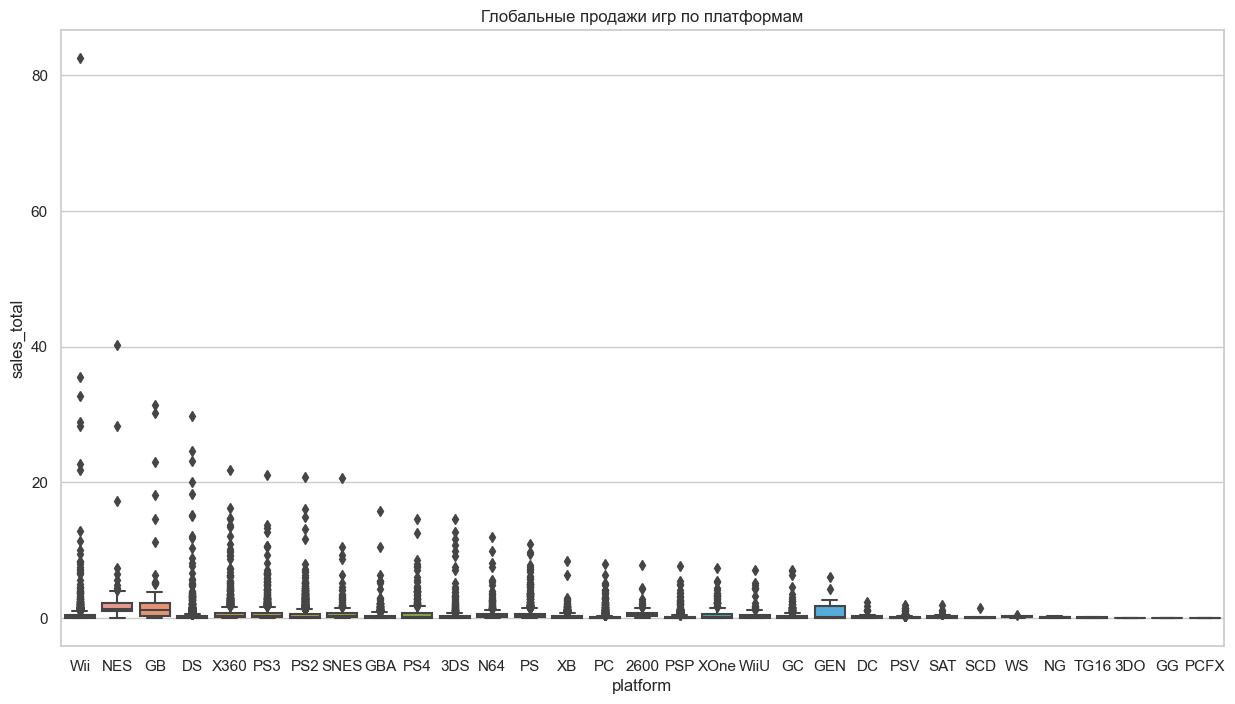

In [192]:
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(x='platform', y='sales_total', data=df)
plt.title('Глобальные продажи игр по платформам')
plt.show()

- Описание результата: <br>
В среднем количество продаж ~ 2 миллиона копий, но в районе выбросов есть популярные игры - проекты с миллионными продажами.

- Как влияют на продажи внутри одной популярной платформы отзывы
пользователей и критиков; Построение диаграммы рассеяния и подсчет корреляции между
отзывами и продажами.

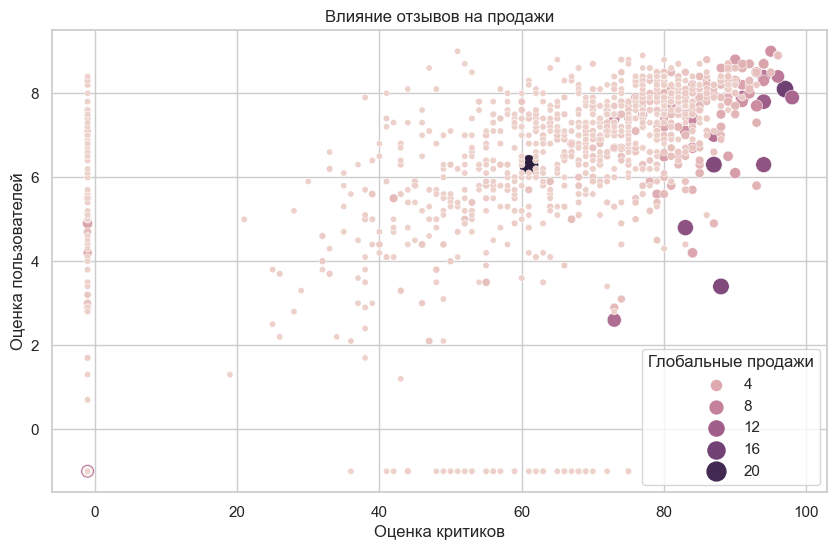

Корреляция между оценкой критиков и продажами: 0.3103667897677202
Корреляция между оценкой пользователей и продажами: 0.2072744403396807


In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

platform_data = df[df['platform'] == 'X360']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='user_score', data=platform_data, hue='sales_total', size='sales_total', sizes=(20, 200))
plt.title('Влияние отзывов на продажи')
plt.xlabel('Оценка критиков')
plt.ylabel('Оценка пользователей')
plt.legend(loc='lower right',  title='Глобальные продажи')
plt.show()

correlation_critic = platform_data['critic_score'].corr(platform_data['sales_total'])
correlation_user = platform_data['user_score'].corr(platform_data['sales_total'])

print(f"Корреляция между оценкой критиков и продажами: {correlation_critic}")
print(f"Корреляция между оценкой пользователей и продажами: {correlation_user}")


На основе проведенного анализа для платформы X360:

1. Корреляция между оценкой критиков и глобальными продажами составляет приблизительно 0.31. Это указывает на слабую положительную связь между оценками критиков и продажами. То есть, в целом, игры с более высокими оценками критиков имеют тенденцию к немного более высоким продажам.

2. Корреляция между оценкой пользователей и глобальными продажами равна приблизительно 0.21. Это также указывает на слабую положительную связь. Таким образом, игры, которые пользуются более высокой оценкой пользователей, склонны к немного более высоким продажам.

<li>Самые прибыльные жанры

In [194]:

genre = actualgames.pivot_table(index='genre', values='sales_total', aggfunc=['sum', 'count'])
genre.columns = ['sum', 'count']
genre.sort_values(by='sum', ascending=False)

,sum,count
genre,,
Action,810.78,1767
Shooter,549.03,500
Sports,465.76,758
Role-Playing,362.59,671
Misc,310.37,782
Platform,160.25,182
Racing,156.37,321
Fighting,113.49,252
Simulation,104.67,340


<bound method Axes.set of <Axes: title={'center': 'Общее распределение игр по жанрам.'}, ylabel='count'>>

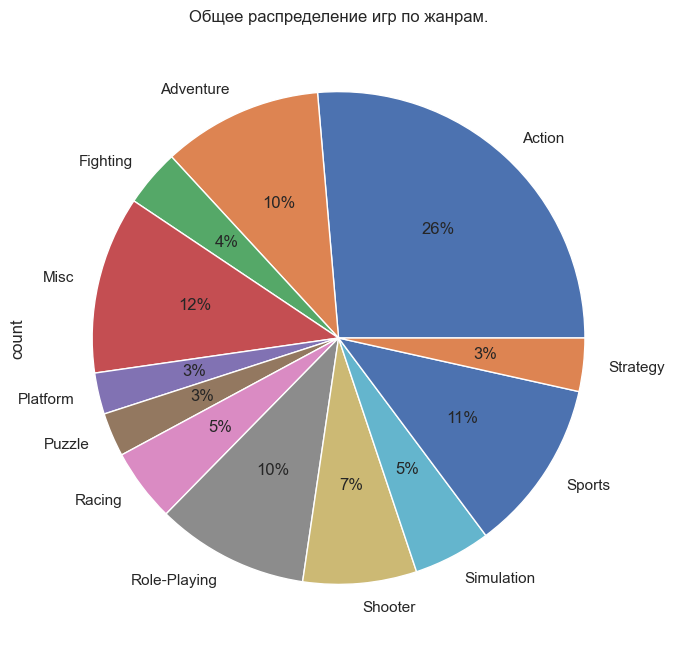

In [195]:
genre.plot(kind='pie',y="count", autopct='%1.0f%%', legend=False, title = "Общее распределение игр по жанрам.", figsize=(8, 8)).set

Самые популярные:
- Экшн
- Спортивные игры
- Ролевые игры / бродилки

<b>Шаг 4. Портрет пользователя каждого региона</b>
Для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5). 

In [196]:
import pandas as pd

top_platforms_na = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_eu = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_jp = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

top_genres_na = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

sales_by_rating_na = df.groupby('rating')['na_sales'].sum()
sales_by_rating_eu = df.groupby('rating')['eu_sales'].sum()
sales_by_rating_jp = df.groupby('rating')['jp_sales'].sum()

average_user = {
    'Северная Америка': {
        'Самые популярные платформы': top_platforms_na.index.tolist(),
        'Самые популярные жанры': top_genres_na.index.tolist(),
        'рейт': sales_by_rating_na.index.tolist(),
    },
    'Европа': {
        'Самые популярные платформы': top_platforms_eu.index.tolist(),
        'Самые популярные жанры': top_genres_eu.index.tolist(),
        'рейт': sales_by_rating_eu.index.tolist(),
    },
    'Япония': {
        'Самые популярные платформы': top_platforms_jp.index.tolist(),
        'Самые популярные жанры': top_genres_jp.index.tolist(),
        'рейт': sales_by_rating_jp.index.tolist(),
    }
}

df_average = pd.DataFrame(average_user)

df_average

,Северная Америка,Европа,Япония
Самые популярные платформы,"[X360, PS2, Wii, PS3, DS]","[PS2, PS3, X360, Wii, PS]","[DS, PS, PS2, SNES, 3DS]"
Самые популярные жанры,"[Action, Sports, Shooter, Platform, Misc]","[Action, Sports, Shooter, Racing, Misc]","[Role-Playing, Action, Sports, Platform, Misc]"
рейт,"[AO, E, E10+, EC, K-A, M, RP, T]","[AO, E, E10+, EC, K-A, M, RP, T]","[AO, E, E10+, EC, K-A, M, RP, T]"


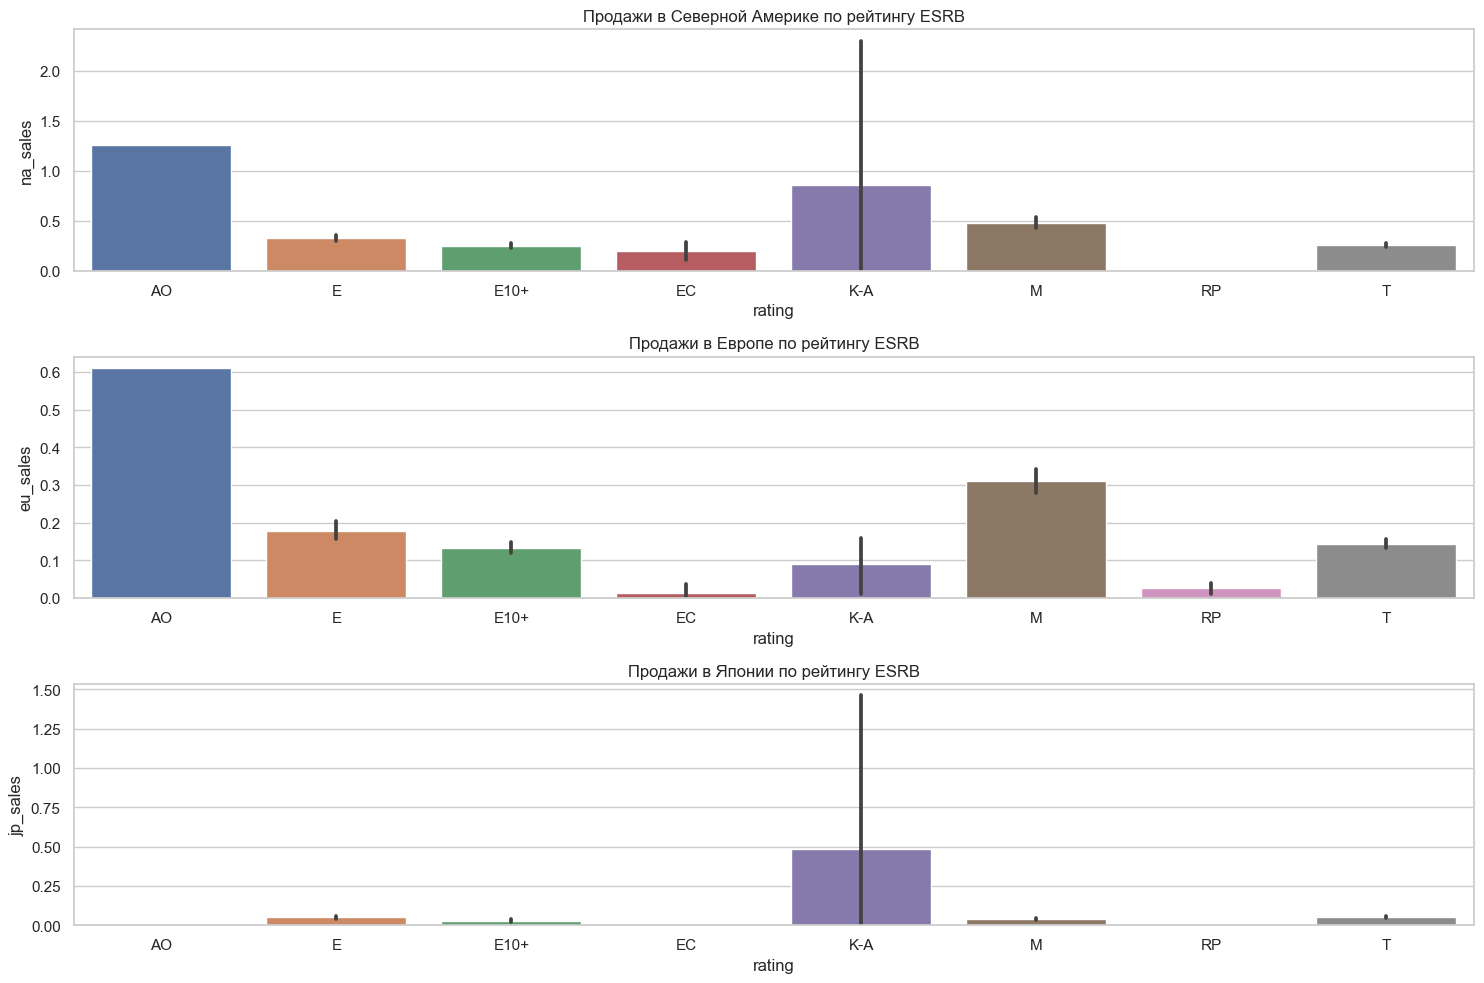

In [197]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
sns.barplot(x='rating', y='na_sales', data=df, order=['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T'])
plt.title('Продажи в Северной Америке по рейтингу ESRB')

plt.subplot(3, 1, 2)
sns.barplot(x='rating', y='eu_sales', data=df, order=['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T'])
plt.title('Продажи в Европе по рейтингу ESRB')

plt.subplot(3, 1, 3)
sns.barplot(x='rating', y='jp_sales', data=df, order=['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T'])
plt.title('Продажи в Японии по рейтингу ESRB')

plt.tight_layout()
plt.show()

- Описание различий в долях продаж.<br>
В Северной Америке и Европе популярны PlayStation (PS2, PS3) и Xbox (X360) платформы, но порядок немного различен.<br>
В Японии наиболее популярны портативные платформы, такие как DS и 3DS, а также классические платформы PlayStation (PS, PS2).
- Пояснение разницы в популярных жанрах.<br>
В Северной Америке и Европе вкусы схожи, с приоритетом в жанрах Action, Sports и Shooter.<br>
В Японии предпочтения смещены в сторону Role-Playing, а также платформеров и разнообразных жанров (Misc)
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?<br>
Расшифровка самых популярных значений рейтинга ESRB:
- AO (Adults Only): Только для взрослых.
- K-A (Kids to Adults): Для детей и взрослых.
- M (Mature): 17 и старше.

Северная Америка (NA):
- Популярные рейтинги: AO, K-A
- Влияние на продажи: Высокие продажи, особенно у игр с рейтингом K-A, ориентированных на детей и взрослых.

Европа (EU):
- Популярные рейтинги: AO, M
- Влияние на продажи: Значительный успех у игр с рейтингами AO и M, указывающий на интерес к контенту для взрослой аудитории.

Япония (JP):
- Популярный рейтинг: K-A
- Влияние на продажи: Игры с рейтингом K-A наиболее популярны в Японии, где приветствуется более семейный и дружелюбный контент.

<b>Шаг 5. Общий вывод</b>

В ходе проделанной работы было выполнено:

- Просмотрена таблица, выявлены пропущенные значения и изменены ошибочные типы данных.
- Проведена предобработка таблицы: замена столбцов и заполнение пропусков.
- Проведен анализ по данным и подготовлены актуальные данные.
- Составлены портреты пользователей для крупных регионов продаж.<br>


Продажи компьютерных игр зависят от платформы, жанра и рейтинга, для разных стран индивидуальные показатели.

